Date: 02/20/2024
Author: Mercy Amankwah
Purpose:  Initial Exploratory analysis of the alzheimers dataset from kaggle.  I might run one basic model. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#finding more about the statistics of the dataset
df_train = pd.read_csv("../data/kaggle_train.csv") 
#df_train.head()
df_train.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,5822.347877,74.960442,0.500291,0.698080,1.283304,27.687408,0.286795,9.978133,4.942195,4.972312,...,5.069688,0.205934,0.156486,4.970744,0.201280,0.158813,0.148342,0.161722,0.296684,0.353112
std,620.850386,9.065000,0.500145,0.994836,0.904339,7.209284,0.452396,5.777363,2.827319,2.900920,...,2.890435,0.404500,0.363422,2.947606,0.401073,0.365608,0.355542,0.368303,0.456929,0.478076
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5292.500000,67.000000,0.000000,0.000000,1.000000,21.641242,0.000000,5.137582,2.612521,2.415726,...,2.562307,0.000000,0.000000,2.324166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5820.000000,75.000000,1.000000,0.000000,1.000000,27.919813,0.000000,9.805564,4.801357,5.050778,...,5.098709,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6357.500000,83.000000,1.000000,1.000000,2.000000,33.842594,1.000000,15.181033,7.380416,7.480424,...,7.496824,0.000000,0.000000,7.583825,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.997203,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#checking the number of fields
fields  = list(df_train.columns)
print(len(fields),'\n\n',fields)

35 

 ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


In [4]:
#checking for missing values and datatypes of the fields.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1719 non-null   int64  
 1   Age                        1719 non-null   int64  
 2   Gender                     1719 non-null   int64  
 3   Ethnicity                  1719 non-null   int64  
 4   EducationLevel             1719 non-null   int64  
 5   BMI                        1719 non-null   float64
 6   Smoking                    1719 non-null   int64  
 7   AlcoholConsumption         1719 non-null   float64
 8   PhysicalActivity           1719 non-null   float64
 9   DietQuality                1719 non-null   float64
 10  SleepQuality               1719 non-null   float64
 11  FamilyHistoryAlzheimers    1719 non-null   int64  
 12  CardiovascularDisease      1719 non-null   int64  
 13  Diabetes                   1719 non-null   int64

**`This data is clean in terms of missing values.  We have no missing values. Each of the fields is populated with 1719 datapoints or records. We might not need to do much for data cleaning using only this dataset`**

In [5]:
#Taking a look at the kind of values are in the different fields.  I want to know for example for categorical data, what the categorization looks like (eg, 0 and 1 or 0, 1,2 etc)
df_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,6184,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,...,0,0,6.643693,0,0,0,0,0,0,XXXConfid
1,5381,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,...,0,1,3.884562,0,0,0,0,1,1,XXXConfid
2,4829,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,...,0,0,4.013722,0,0,1,1,0,1,XXXConfid
3,5117,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,...,0,0,9.355700,1,0,1,0,1,0,XXXConfid
4,6747,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,...,1,0,8.818932,0,1,0,0,0,1,XXXConfid


### **Checking for outliers:**

Since outliers can distort model performance, we need to check for **implausible values** or **extreme deviations** in numerical fields. Below is an analysis of potential outliers for each relevant column.

---

#### **1. Unique Identifiers & Categorical Columns (No Outliers Expected)** 
- **`PatientID`**, **`Gender`**, **`Ethnicity`**, **`EducationLevel`**, **`FamilyHistoryAlzheimers`**, **`Diagnosis`**, **`DoctorInCharge`**  
- Dataset values:
  - Gender: 0 = Male, 1 = Female.
  - Ethnicity: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other.

---
#### **2. Age related features** : 
- **`Age`**  
- Dataset range: 60–90 years
- We'll check for **implausible ages** (e.g., below 40 or above 120 years).  
  - In Alzheimer's studies, patients are typically **50+ years**; an 18-year-old with a diagnosis might be an error.  
  - We'll use histograms or boxplots to detect extreme values.  

---

#### **3. Health & Lifestyle Metrics**  
- **`BMI` (Body Mass Index)**  
  - Dataset range: 15–40
  - Normal BMI range: **18.5 - 24.9** (Overweight: 25-29.9, Obese: 30+)  
  - Outliers: Extremely low (<10) or extremely high (>60) BMI values.  

- **`Smoking`**, **`AlcoholConsumption`**, **`PhysicalActivity`**, **`DietQuality`**, **`SleepQuality`**  
  - Since these are encoded numerically, we'll check for values outside the expected range.  
  - Dataset values:
    - Smoking: 0 = No, 1 = Yes.
    - AlcoholConsumption: Weekly alcohol units (0–20).
    - PhysicalActivity: Weekly hours of physical activity (0–10).
    - DietQuality: Diet score (0–10).
    - SleepQuality: Sleep quality score (4–10).

---

#### **4. Cardiovascular & Metabolic Conditions**  
- **`Hypertension`** (Binary: {0,1})
  - Dataset: 0 = No, 1 = Yes.
  - We'll ensure values are within {0,1}.  

- **`SystolicBP` (Systolic Blood Pressure, mmHg)**  
  - Dataset: 90–180 mmHg
  - Normal range: **90 - 120 mmHg**  
  - Outliers: Below 70 mmHg (hypotension) or above 200 mmHg (hypertensive crisis).  

- **`DiastolicBP` (Diastolic Blood Pressure, mmHg)**  
  - Normal range: **60 - 80 mmHg**  
  - Outliers: Below 40 mmHg or above 120 mmHg.  

- **`CholesterolTotal` (Total Cholesterol, mg/dL)**  
  - Dataset range: 150–300 mg/dL
  - Normal range: **125 - 200 mg/dL**  
  - Outliers: Below 100 mg/dL (too low) or above 300 mg/dL (extremely high).  

- **`CholesterolLDL` (Low-Density Lipoprotein, mg/dL)**  
  - Dataset range: 50–200 mg/dL
  - Normal range: **< 100 mg/dL (optimal), 130+ (high risk)**  
  - Outliers: Below 50 mg/dL or above 190 mg/dL.  

- **`CholesterolHDL` (High-Density Lipoprotein, mg/dL)**  
  - Dataset range: 20–100 mg/dL
  - Normal range: **40-60 mg/dL**  
  - Outliers: Below 20 mg/dL (too low) or above 100 mg/dL.  

- **`CholesterolTriglycerides` (Triglycerides, mg/dL)**  
  - Dataset range: 50–400 mg/dL
  - Normal range: **< 150 mg/dL**  
  - Outliers: Below 50 mg/dL or above 400 mg/dL.  

---

#### **5. Cognitive & Functional Scores**  
- **`MMSE` (Mini-Mental State Examination, 0-30 scale)**  
  - Dataset range: 0–30
  - Normal range: **0-30**  
  - Outliers: Values below 0 or above 30 are invalid.  

- **`FunctionalAssessment`**, **`ADL` (Activities of Daily Living score)**  
  - Dataset range: 0–10
  - Outliers: We will check for invalid negative values or values exceeding max scale (typically 100). ?? 

---

#### **6. Behavioral & Psychological Symptoms**  
- **`MemoryComplaints`**, **`BehavioralProblems`**, **`Confusion`**, **`Disorientation`**, **`PersonalityChanges`**, **`DifficultyCompletingTasks`**, **`Forgetfulness`**  
  - If encoded as **binary** (Yes/No): Ensure consistency.  
  - If on a **scale (e.g., 1-10)**: Check for values outside expected range.  
  - Dataset: 
    - ADL: Activities of Daily Living score: 0–10
    - MemoryComplaints: 0 = No, 1 = Yes.
    - BehavioralProblems: 0 = No, 1 = Yes.
    - Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness: All binary (0 = No, 1 = Yes).

---

### **How to Detect Outliers?**  
✅ **Visual Methods:**  
- **Boxplots** – Identify extreme values.  
- **Histograms** – Detect skewed distributions.  
- **Scatter Plots** – Spot abnormal patterns.  

✅ **Statistical Methods:**  
- **Z-Score (>3 or <-3 indicates extreme values).**  
- **Interquartile Range (IQR method):**  
  - Define outliers as values **below Q1 - 1.5*IQR** or **above Q3 + 1.5*IQR**.  

  




<Axes: >

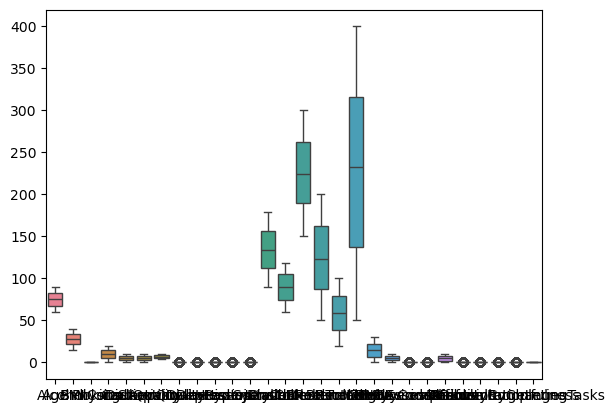

In [15]:
#Checking for outliers 

#fields.remove(['PatientID','Gender','Ethnicity','EducationLevel','FamilyHistoryAlzheimers','Diagnosis','DoctorInCharge'])
#del fields([0,2,3,4,11,33,34])


check_for_outliers = [e for e in fields if e not in ('PatientID','Gender','Ethnicity','EducationLevel','FamilyHistoryAlzheimers','Diagnosis','DoctorInCharge')]
#print(check_for_outliers)

sns.boxplot(df_train[check_for_outliers])

['Age',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']